# 逻辑回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读入训练数据
train = np.loadtxt('images2.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

In [4]:
# 初始化参数
theta = np.random.rand(3)

In [5]:
# 标准化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma

In [6]:
train_z = standardize(train_x)

In [7]:
# 增加 x0
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

In [8]:
X = to_matrix(train_z)

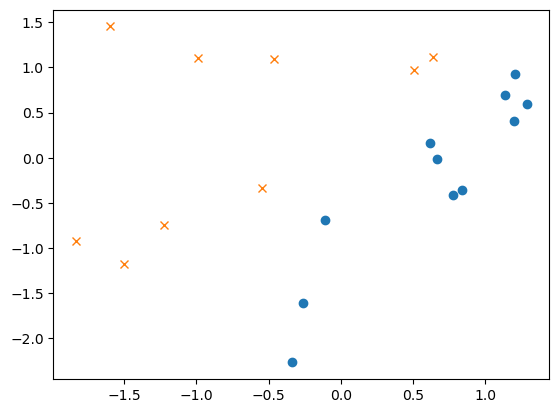

In [9]:
# 将标准化后的训练数据画成图
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

In [10]:
# sigmod 函数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [11]:
# 学习率
ETA = 1e-3

In [12]:
# 重复次数
epoch = 5000

In [13]:
# 更新次数
count = 0

In [14]:
# 重复学习
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 日志输出
    # count += 1
    # print('第 {} 次 : theta = {}'.format(count, theta))

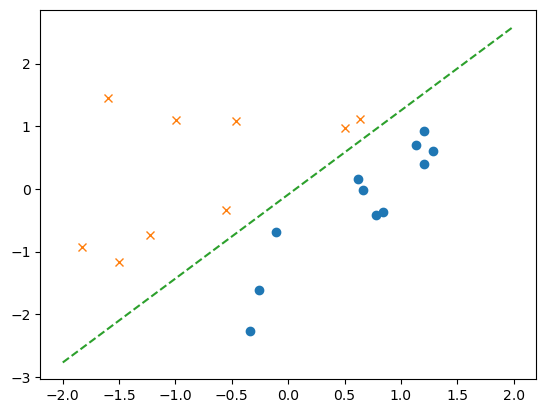

In [15]:
# 绘图确认
x0 = np.linspace(-2, 2, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()

## 验证

In [17]:
f(to_matrix(standardize([
    [200, 100], # 200 X 100 的横向图像 
    [100 ,200]  # 100 X 200 的纵向图像
])))

array([0.91572843, 0.03019996])

In [18]:
# 确定一个阈值
def classify(x):
    return (f(x) >= 0.5).astype(int)

In [19]:
classify(to_matrix(standardize([
    [200, 100], # 200 X 100 的横向图像 
    [100 ,200]  # 100 X 200 的纵向图像
])))

array([1, 0])